MNIST

In [113]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.activations import softmax
from sklearn.model_selection import train_test_split
import time


In [151]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [152]:
train.shape

(42000, 785)

In [153]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
test.shape

(28000, 784)

In [155]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
# Seperating target and image pixels
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
Y_train = train.iloc[:,0].values.astype('int32') # only labels
X_test = test.values.astype('int32')

In [161]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_train.shape

In [121]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


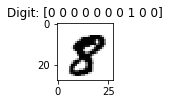

In [122]:
plt.figure(figsize=(12,10))
plt.subplot(y, x, 5)
plt.imshow(X_train[10].reshape((28,28)), cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("Digit: {}".format(Y_test[10]))
plt.show()

In [123]:
#Reshaping train to 28 * 28 pixel size with 1 color (grey scale)
X_train = X_train.reshape(-1, 28, 28, 1)
#X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [124]:
#Reshaping test to 28 * 28 pixel size with 1 color (grey scale)
X_test = X_test.reshape(-1, 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [125]:
# Find the unique numbers from the train labels
#classes = np.unique(Y_train)
#nClasses = len(classes)
#print('Total number of outputs : ', nClasses)
#print('Output classes : ', classes)

In [126]:
#Label encoding
#Y_train = to_categorical(Y_train, num_classes = nClasses)
Y_train = to_categorical(Y_train).astype("uint8")

In [127]:
Y_train.shape

(42000, 10)

In [128]:
# Normalize the data,
# Colors are from 0 to 255. 
X_train = X_train / 255.0
X_test = X_test / 255.0


In [129]:
Y_train.shape

(42000, 10)

In [130]:
np.random.seed(0)

In [131]:
# Split the train and the validation set for the fitting
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


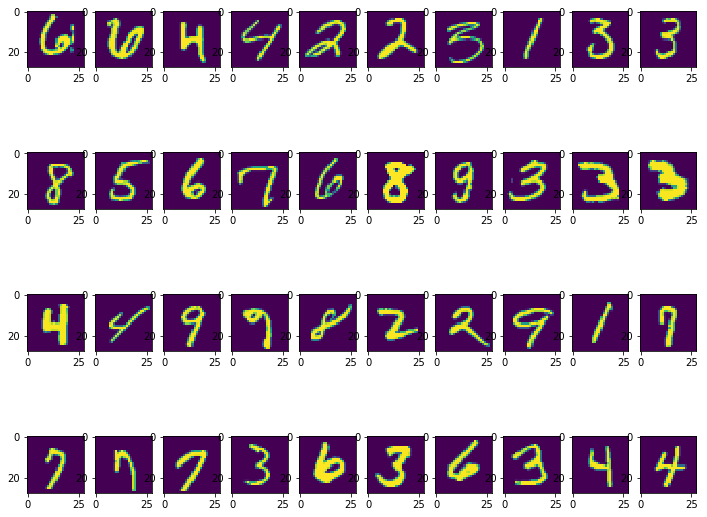

In [132]:
%matplotlib inline
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [133]:
#Check for null and missing values, converting to pandas dataframe

In [134]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [135]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [136]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15)
datagen.fit(X_train)

In [137]:
def create_model():
    model = Sequential()
    #use Conv2D to create our first convolutional layer, with 32 filters, 5x5 filter size, 
    #input_shape = input image with (height, width, channels), activate ReLU to turn negative to zero
    model.add(Conv2D(16, kernel_size=(5, 5),
                activation='relu',
                input_shape=(28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
    model.add(BatchNormalization())
    #add a pooling layer for down sampling
    model.add(MaxPool2D(pool_size=(2, 2)))
    #set 25% of the layer's activation to zero, to void overfit
    model.add(Dropout(0.25))
    # add another conv layer with 64 filters, 3x3 filter size,
    model.add(Conv2D(64, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3),
                padding='same',
                activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #convert a 2D matrix in a vector
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #add a fully-connected layer with softmax function to squash values to 0...1 
    model.add(Dense(10, activation='softmax')) #tanh


    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model



In [138]:
#print( keras.__version__ )
#print( tensorflow.__version__ )

In [139]:
model

In [142]:
batch_size = 64
num_classes = 10
epochs = 5
input_shape = (28, 28, 1)

In [143]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [149]:
starttime = time.time()
cnn = model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=1, validation_data = (X_test, Y_test))
print ("Time elapsed in training: ", time.time()- starttime, "s")

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 4400/33600 [==>...........................] - ETA: 2:20 - loss: 0.0202 - acc: 0.9936

KeyboardInterrupt: 

In [ ]:
#PLot
plt.figure(figsize=[8,6])
plt.plot(cnn.history['loss'],'r',linewidth=3.0)
plt.plot(cnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(cnn.history['acc'],'r',linewidth=3.0)
plt.plot(cnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
# predict results
results = model.predict(X_test)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)


In [ ]:
results.head()

In [ ]:
submission['Label'].fillna(0, inplace=True)

In [ ]:
submission['Label'] = submission['Label'].astype('int32')

In [ ]:
submission.head()

In [ ]:
submission.to_csv("mnist_cnn.csv",index=False)

In [ ]:
pd.read_csv("mnist_cnn.csv").head()

In [ ]:
final_loss, final_acc = model.evaluate(X_test, Y_test, verbose=0)
#print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

In [ ]:
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)


In [ ]:
score = model.evaluate(x_test, y_test, batch_size=16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])